In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [38]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4831,ham,Rats. Hey did u ever vote for the next themes?,NaN,NaN,NaN
1645,ham,I.ll post her out l8r. In class,NaN,NaN,NaN
5355,ham,Living is very simple.. Loving is also simple....,NaN,NaN,NaN
1256,ham,"Not yet chikku..going to room nw, i'm in bus..",NaN,NaN,NaN
1525,ham,Pls pls find out from aunt nike.,NaN,NaN,NaN


In [39]:
df.shape # 5572 rows and 5 columns

(5572, 5)

In [40]:
# Steps that will be carried out through out the process:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Improvements if needed
# 7. Turning the model into a web app
# 8. Deployment


## 1. Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [42]:
# dropping last three columns as they are not needed
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [43]:
df.sample(5)

,v1,v2
1884,ham,I love your ass! Do you enjoy doggy style? :)
2108,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...
3117,ham,R u saying i should re order the slippers cos ...
2905,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."
2758,ham,What time. IÛ÷m out until prob 3 or so


In [44]:
# renaming the columns for better understanding
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [45]:
df.sample(5)

,Target,Text
5240,ham,"Gud gud..k, chikku tke care.. sleep well gud nyt"
810,ham,S:)s.nervous &lt;#&gt; :)
13,ham,I've been searching for the right words to tha...
2207,ham,Usually the body takes care of it buy making s...
4209,ham,No da:)he is stupid da..always sending like th...


In [46]:
# Using Label Encoding to convert the target variable into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
df['Target'] = encoder.fit_transform(df['Target']) # 0 for ham and 1 for spam

In [51]:
df.sample(5)

,Target,Text
1200,0,Otherwise had part time job na-tuition..
1090,1,WIN URGENT! Your mobile number has been awarde...
346,0,Dis is yijue. I jus saw ur mail. In case huimi...
4978,0,Spending new years with my brother and his fam...
4308,0,He dint tell anything. He is angry on me that ...


In [52]:
# Checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [53]:
# Checking for duplicate values
df.duplicated().sum()

403

In [55]:
# Dropping duplicate rows
df = df.drop_duplicates(keep='first')

In [56]:
df.duplicated().sum()

0

In [58]:
df.shape

(5169, 2)

## 2. EDA

In [59]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

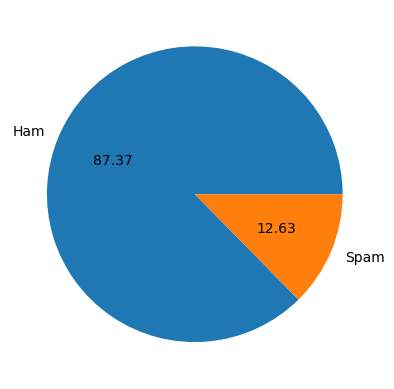

In [62]:
# Ploting the pie chart of  target variable
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()


Since from the pie chart, it is obvious that the data is imbalanced

In [63]:
import nltk

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rafy
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['num_characters'] = df['Text'].apply(len)

In [74]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Rafy
[nltk_data]     Mustafa\AppData\Roaming\nltk_data...


[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [80]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [81]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [84]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [85]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# ham messages
df[df['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [89]:
# spam messages
df[df['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [90]:
#ploting a histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

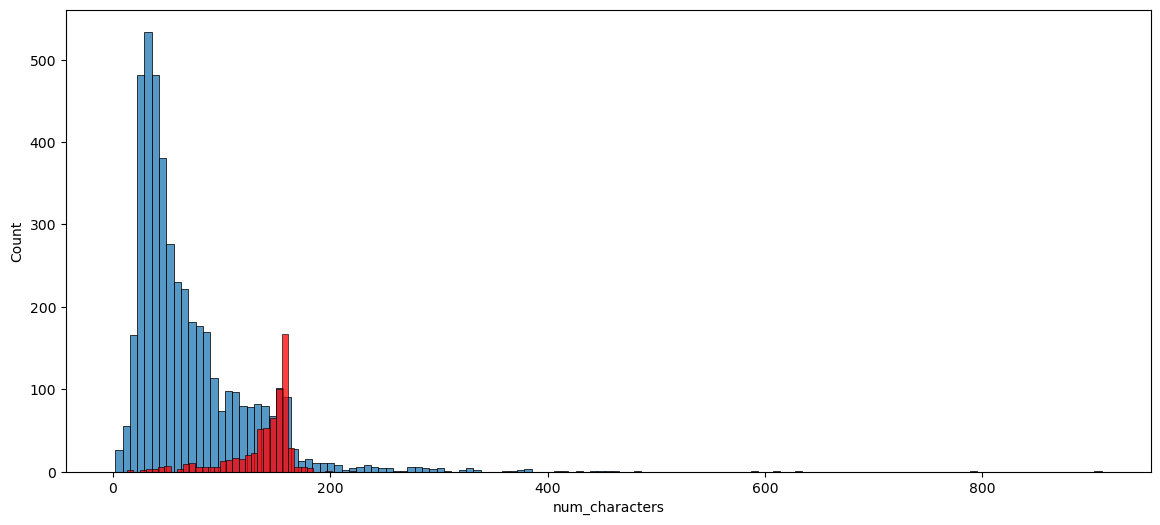

In [94]:
# histogram for number of characters in ham and spam messages
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

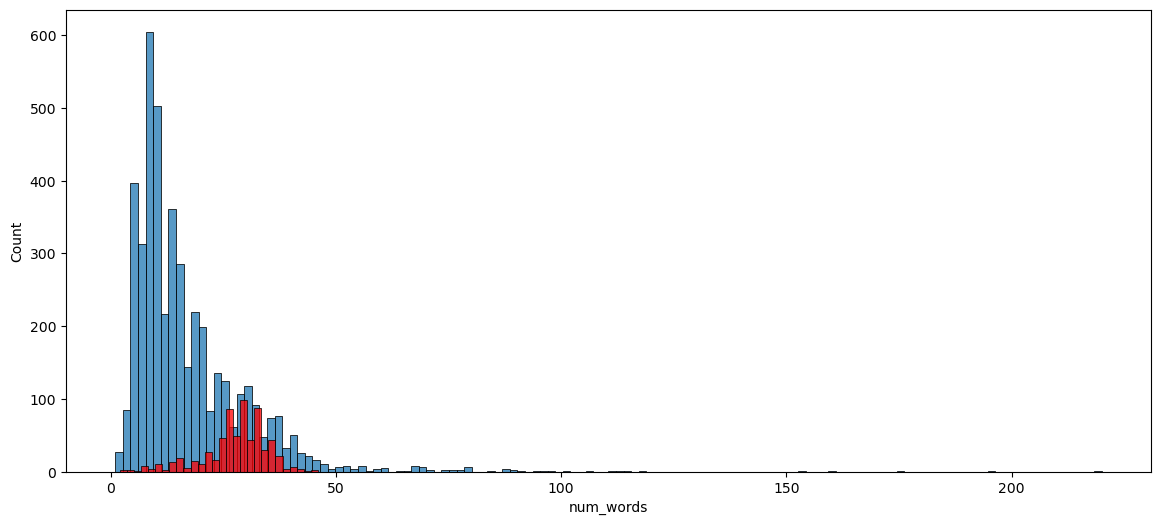

In [95]:
# histogram for number of words in ham and spam messages
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color='red')

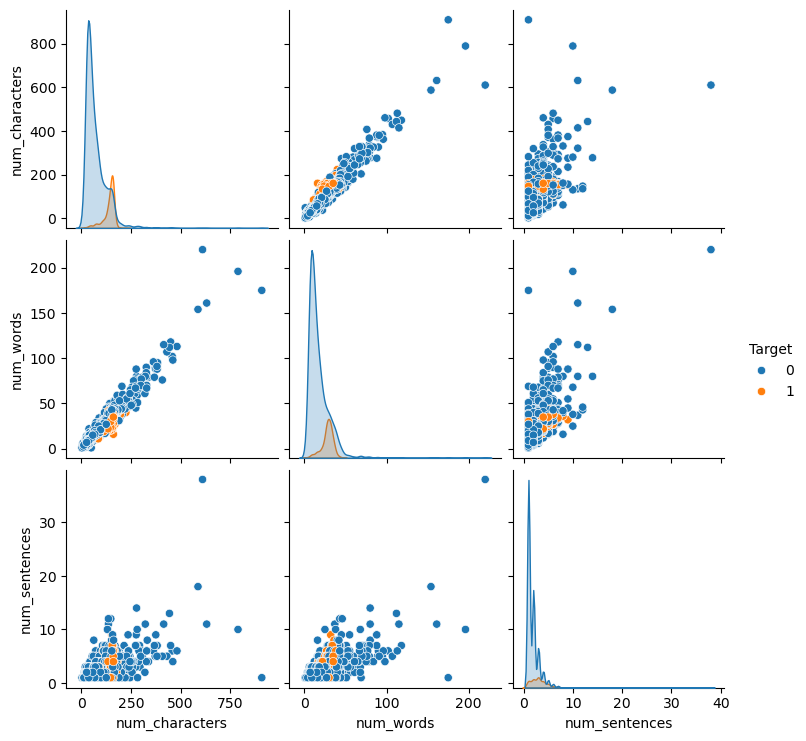

In [96]:
# Plotting a pairplot
sns.pairplot(df, hue='Target')

<Axes: >

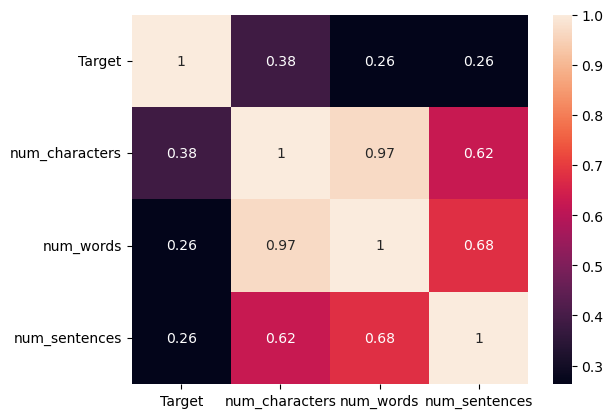

In [100]:
# checking the correlation between the numeric features
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)